In [ ]:
import pandas as pd
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
!pip install pyLDAvis
# conda install -c conda-forge pyldavis
# conda install -c conda-forge pyldavis
import pyLDAvis.gensim

     |████████████████████████████████| 1.7MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=40455853393f7857c469687e17d34686f6a09f8129de4d8bef8d98525b42f06c
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from nltk.corpus import stopwords
import string 
from nltk.stem.wordnet import WordNetLemmatizer


/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


In [ ]:
import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [ ]:
import pandas as pd
f=pd.read_csv("scrape.csv")
keep_col = ['subject','text']
new_f = f[keep_col]
new_f.to_csv("scrape2.csv", index=False)

In [ ]:
df= pd.read_csv('scrape2.csv')
print(df.shape)
df

(26330, 2)


,subject,text
0,Second lockdown will take heavy toll on mental...,Mentally so far I've been a little better than...
1,POSITIVITY: Write something good that you are ...,"It is very much the little things for me, toda..."
2,Second lockdown will take heavy toll on mental...,I had to queue for 30 minutes to get into ASDA...
3,Second lockdown will take heavy toll on mental...,"Exactly, on one side you have people moaning t..."
4,Second lockdown will take heavy toll on mental...,To know everyone is out you'd have to be out y...
...,...,...
26325,Novavax Trial Symptoms,No real side effects for me. Have been a bit s...
26326,Can I fly back to my home country during the n...,Sounds like the flight has come and gone. Were...
26327,Wheres the interim analysis of the Oxford Astr...,Probably next week you dumbbell 😅👍
26328,Where are people getting Covid from?,Other people with covid


In [ ]:
df['text']=df['text'].apply(str)
df['subject']=df['subject'].apply(str)

In [ ]:
import re
# Remove punctuation
df['text2'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text2'] = \
df['text2'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text2'].head()
print(df.head())

                                             subject  ...                                              text2
0  Second lockdown will take heavy toll on mental...  ...  mentally so far i've been a little better than...
1  POSITIVITY: Write something good that you are ...  ...  it is very much the little things for me today...
2  Second lockdown will take heavy toll on mental...  ...  i had to queue for 30 minutes to get into asda...
3  Second lockdown will take heavy toll on mental...  ...  exactly on one side you have people moaning th...
4  Second lockdown will take heavy toll on mental...  ...  to know everyone is out you'd have to be out y...

[5 rows x 3 columns]


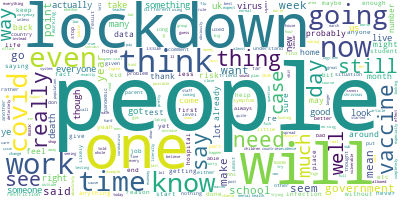

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text2'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.text2.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['mentally', 'far', 'little', 'better', 'thought', 'would', 'think', 'part', 'feel', 'like', 'hugely', 'intense', 'lockdown', 'time', 'around', 'even', 'though', 'media', 'made', 'sound', 'like', 'would', 'able', 'grab', 'coffee', 'every', 'day', 'grab', 'takeaway', 'support']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.017*"people" + 0.011*"get" + 0.010*"like" + 0.008*"go" + 0.007*"think" + '
  '0.006*"would" + 0.006*"going" + 0.005*"work" + 0.005*"time" + 0.005*"need"'),
 (1,
  '0.014*"people" + 0.014*"vaccine" + 0.010*"covid" + 0.007*"would" + '
  '0.005*"virus" + 0.005*"immunity" + 0.005*"get" + 0.005*"uk" + '
  '0.005*"health" + 0.004*"government"'),
 (2,
  '0.025*"people" + 0.010*"lockdown" + 0.009*"think" + 0.009*"would" + '
  '0.006*"day" + 0.006*"really" + 0.006*"like" + 0.005*"year" + 0.005*"anti" + '
  '0.005*"see"'),
 (3,
  '0.012*"one" + 0.007*"people" + 0.006*"would" + 0.006*"going" + 0.005*"get" '
  '+ 0.005*"work" + 0.005*"like" + 0.004*"even" + 0.004*"think" + '
  '0.004*"really"'),
 (4,
  '0.014*"people" + 0.010*"test" + 0.009*"days" + 0.008*"lockdown" + '
  '0.008*"covid" + 0.007*"get" + 0.007*"symptoms" + 0.007*"one" + 0.006*"know" '
  '+ 0.006*"would"'),
 (5,
  '0.011*"positive" + 0.007*"covid" + 0.007*"get" + 0.006*"flu" + 0.006*"th" + '
  '0.006*"cases" + 0.006*"number

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

In [ ]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(26331)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9871,"people, get, like, go, think, would, going, wo...","[mentally, far, little, better, thought, would..."
1,1,2.0,0.8434,"people, lockdown, think, would, day, really, l...","[much, little, things, today, excited, cup, de..."
2,2,3.0,0.4090,"one, people, would, going, get, work, like, ev...","[queue, minutes, get, asda, really, hoped, sup..."
3,3,0.0,0.8542,"people, get, like, go, think, would, going, wo...","[exactly, one, side, people, moaning, schools,..."
4,4,0.0,0.7198,"people, get, like, go, think, would, going, wo...","[know, everyone]"
...,...,...,...,...,...
26325,26325,0.0,0.6657,"people, get, like, go, think, would, going, wo...","[real, side, effects, bit, sleepy, past, two, ..."
26326,26326,0.0,0.9356,"people, get, like, go, think, would, going, wo...","[sounds, like, flight, come, gone, able, board..."
26327,26327,5.0,0.8320,"positive, covid, get, flu, th, cases, number, ...","[probably, next, week, dumbbell]"
26328,26328,1.0,0.7195,"people, vaccine, covid, would, virus, immunity...","[people, covid]"


In [ ]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9917,"people, get, like, go, think, would, going, work, time, need","[black, white, like, governements, thinking, needs, flexibility, classed, vulnerable, wife, extr..."
1,1.0,0.9925,"people, vaccine, covid, would, virus, immunity, get, uk, health, government","[doubt, lockdowns, devastating, last, resort, thing, even, take, argument, many, presuppositions..."
2,2.0,0.9844,"people, lockdown, think, would, day, really, like, year, anti, see","[cancer, deaths, doubled, would, absolute, disaster, roughly, equivalent, extra, deaths, day, re..."
3,3.0,0.9862,"one, people, would, going, get, work, like, even, think, really","[seems, relevant, bit, close, cover, put, sign, saying, non, essential, order, collection, think..."
4,4.0,0.9896,"people, test, days, lockdown, covid, get, symptoms, one, know, would","[also, similar, analysis, got, different, results, though, https, imgurcom, gallery, mtesuas, ma..."
5,5.0,0.9976,"positive, covid, get, flu, th, cases, number, one, like, days","[nation, stats, england, deaths, date, reported, today, within, days, positive, test, breakdown,..."


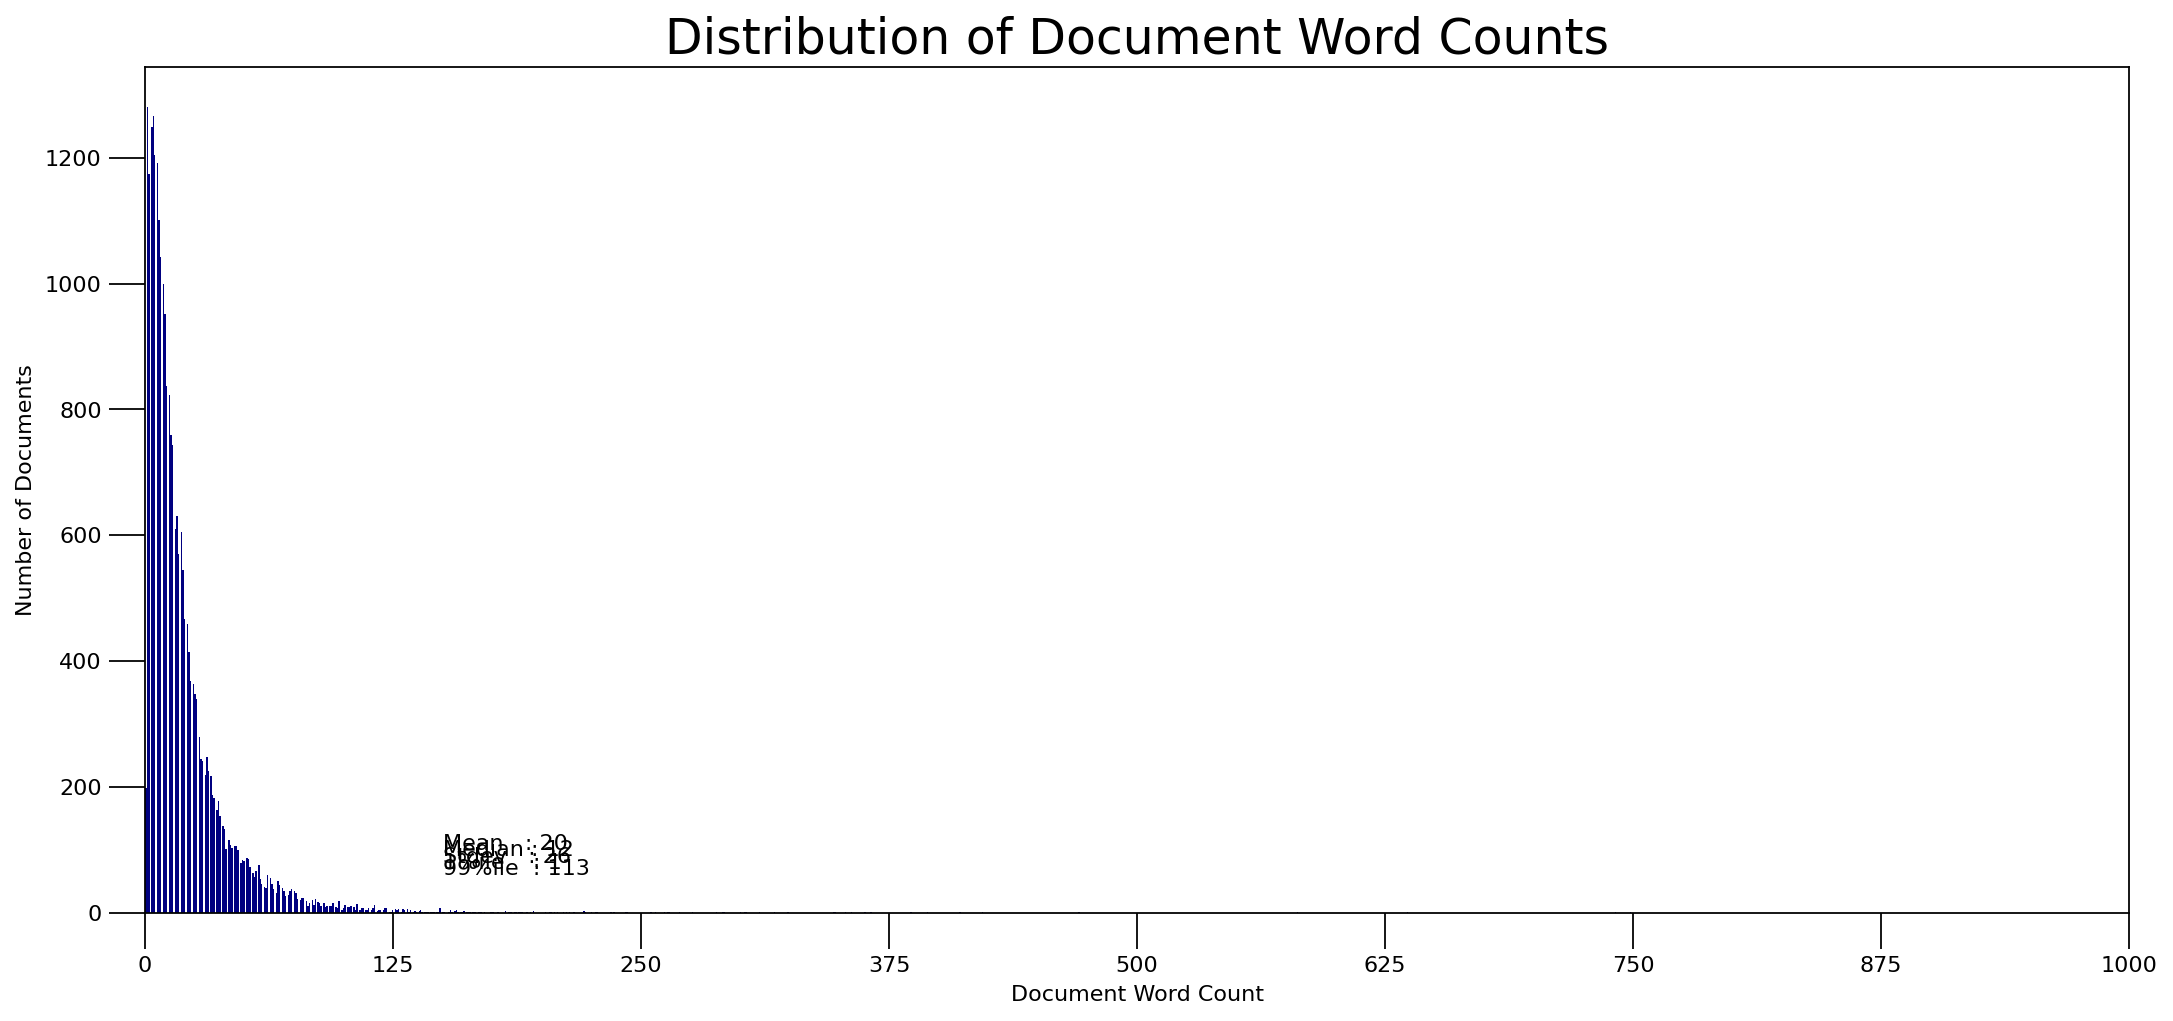

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(150, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(150,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(150,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(150,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(150,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

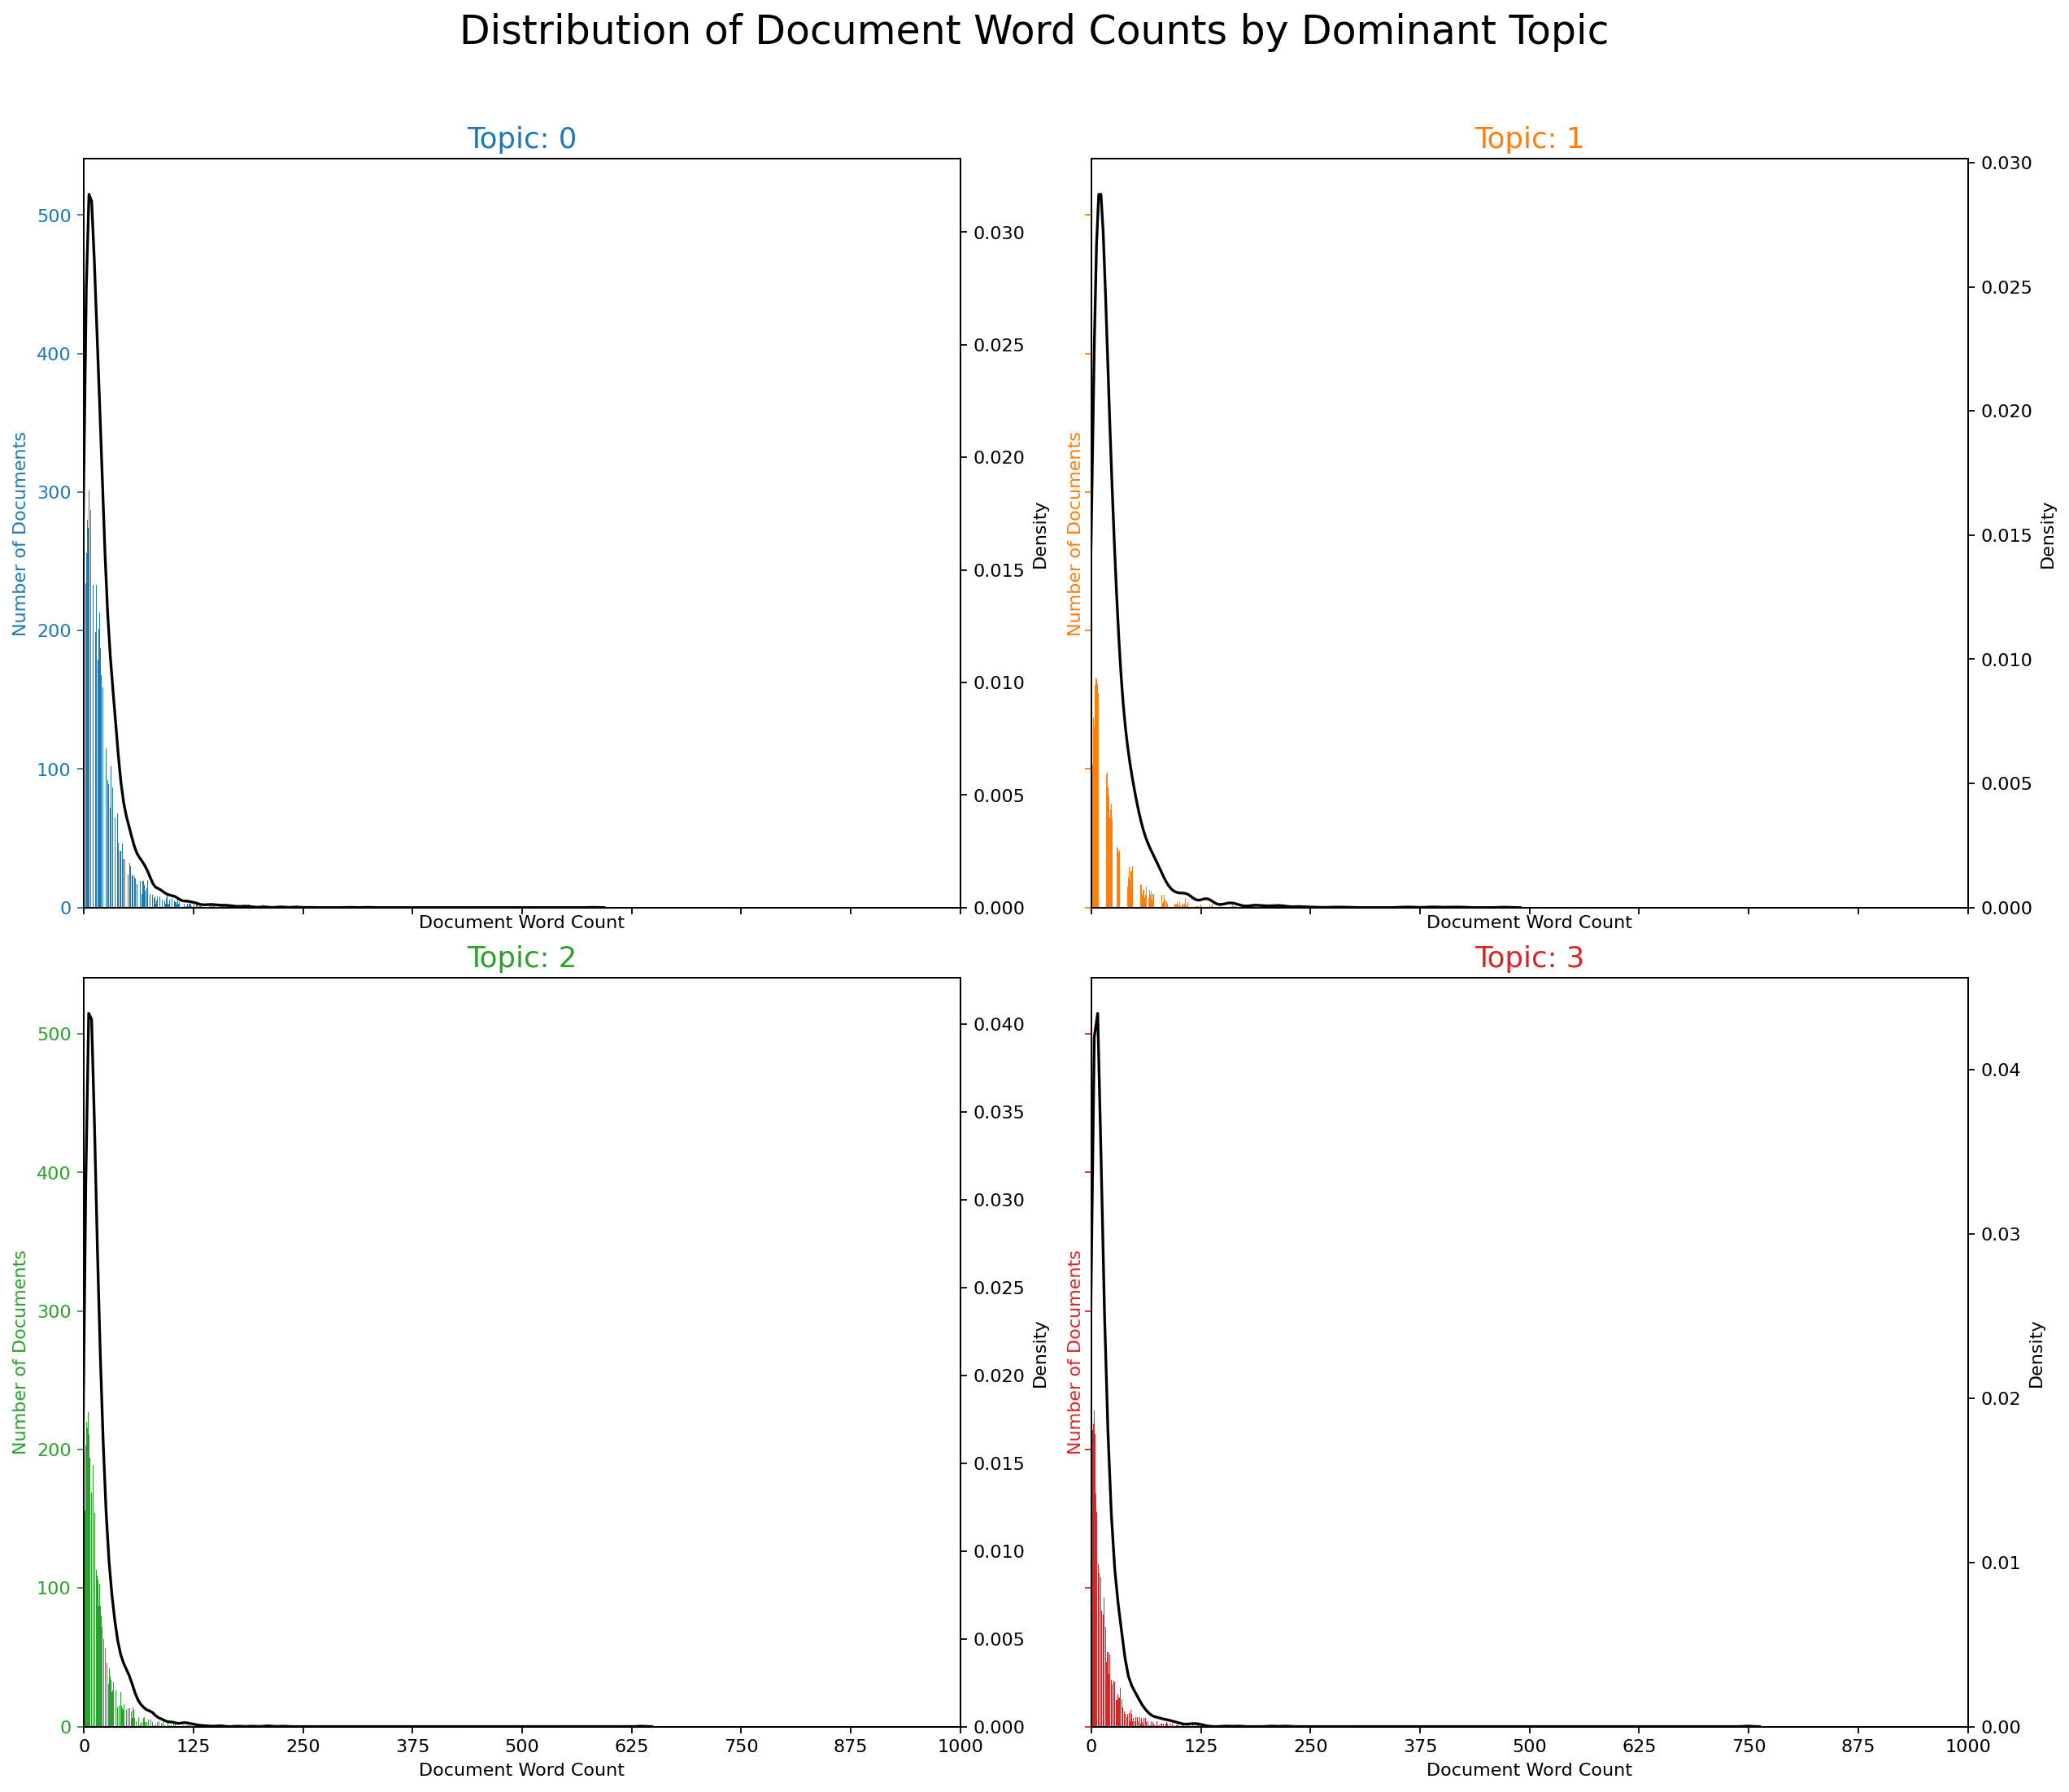

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

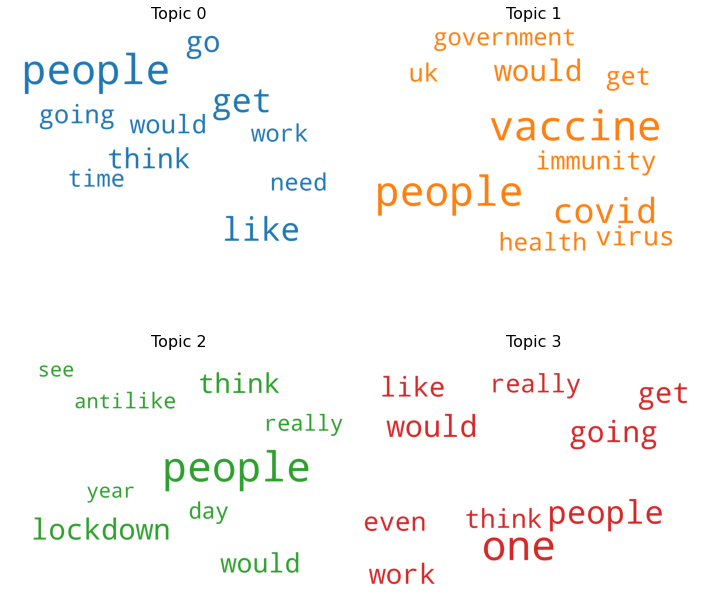

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.038434 -0.028571       1        1  30.129177
1      0.076664  0.056821       2        1  19.274105
2      0.058121 -0.004349       3        1  15.692922
4     -0.019724  0.060289       4        1  14.868378
3     -0.026174 -0.123931       5        1  10.396384
5     -0.127320  0.039742       6        1   9.639035, topic_info=          Term         Freq        Total Category  logprob  loglift
577   positive   971.000000   971.000000  Default  30.0000  30.0000
878       test  1159.000000  1159.000000  Default  29.0000  29.0000
1593   vaccine  2337.000000  2337.000000  Default  28.0000  28.0000
314       days  1381.000000  1381.000000  Default  27.0000  27.0000
95         one  2770.000000  2770.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
48        time   191.343360  2092.494124   Topic6  -5.5572  -0.0527
34      people   224.161622  7706.144805   Topic6  -5.3989  -1.1981
51       would   182.495863  3282.911515   Topic6  -5.6045  -0.5504
1593   vaccine   174.277626  2337.272474   Topic6  -5.6506  -0.2567
317         go   169.900608  2006.210648   Topic6  -5.6760  -0.1294

[554 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.581292       able
0         2  0.111787       able
0         3  0.092224       able
0         4  0.079648       able
0         5  0.051701       able
...     ...       ...        ...
135       5  0.028436  yesterday
135       6  0.783580  yesterday
1317      6  0.948732  yorkshire
4980      1  0.943440       zone
4980      6  0.031448       zone

[1520 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4, 6])

In [ ]:
lda_corpus=lda_model[corpus]
[doc for doc in lda_corpus]

[[(0, 0.98706996)],
 [(2, 0.8433828), (3, 0.121146105)],
 [(0, 0.40892595),
  (1, 0.016721398),
  (2, 0.016755886),
  (3, 0.40896192),
  (4, 0.016837249),
  (5, 0.13179757)],
 [(0, 0.8542418), (3, 0.1304735)],
 [(0, 0.71983266),
  (1, 0.055953223),
  (2, 0.056041542),
  (3, 0.055890124),
  (4, 0.056392685),
  (5, 0.05588975)],
 [(0, 0.021002477),
  (1, 0.021104567),
  (2, 0.8947907),
  (3, 0.02104076),
  (4, 0.021018561),
  (5, 0.021042945)],
 [(0, 0.033589654),
  (1, 0.033643942),
  (2, 0.8317931),
  (3, 0.03379775),
  (4, 0.033641476),
  (5, 0.03353411)],
 [(2, 0.19201803), (5, 0.7848124)],
 [(0, 0.05588754),
  (1, 0.05583608),
  (2, 0.72075903),
  (3, 0.055681843),
  (4, 0.056184884),
  (5, 0.055650603)],
 [(0, 0.58333087),
  (1, 0.08333356),
  (2, 0.08333346),
  (3, 0.083334096),
  (4, 0.08333469),
  (5, 0.08333337)],
 [(0, 0.43034303), (3, 0.20976137), (5, 0.3396912)],
 [(2, 0.9677516)],
 [(3, 0.21742755), (5, 0.7430162)],
 [(0, 0.24067736),
  (1, 0.010489018),
  (2, 0.41759658),


In [ ]:
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9917,"people, get, like, go, think, would, going, work, time, need","[black, white, like, governements, thinking, needs, flexibility, classed, vulnerable, wife, extr..."
1,1.0,0.9925,"people, vaccine, covid, would, virus, immunity, get, uk, health, government","[doubt, lockdowns, devastating, last, resort, thing, even, take, argument, many, presuppositions..."
2,2.0,0.9844,"people, lockdown, think, would, day, really, like, year, anti, see","[cancer, deaths, doubled, would, absolute, disaster, roughly, equivalent, extra, deaths, day, re..."
3,3.0,0.9862,"one, people, would, going, get, work, like, even, think, really","[seems, relevant, bit, close, cover, put, sign, saying, non, essential, order, collection, think..."
4,4.0,0.9896,"people, test, days, lockdown, covid, get, symptoms, one, know, would","[also, similar, analysis, got, different, results, though, https, imgurcom, gallery, mtesuas, ma..."
5,5.0,0.9976,"positive, covid, get, flu, th, cases, number, one, like, days","[nation, stats, england, deaths, date, reported, today, within, days, positive, test, breakdown,..."


In [ ]:
df_dominant_topic.head(26331)
df2=df_dominant_topic
df2.head()
df2.shape

(26330, 5)

In [ ]:
df.head()

,subject,text,text2
0,"Second lockdown will take heavy toll on mental health, charities warn","Mentally so far I've been a little better than I thought I would be, and I think part of that is...",mentally so far i've been a little better than i thought i would be and i think part of that is ...
1,POSITIVITY: Write something good that you are grateful for today,"It is very much the little things for me, today I was excited to be having a cup of decent coffe...",it is very much the little things for me today i was excited to be having a cup of decent coffee...
2,"Second lockdown will take heavy toll on mental health, charities warn","I had to queue for 30 minutes to get into ASDA, really hoped supermarket queues wouldn't be back.",i had to queue for 30 minutes to get into asda really hoped supermarket queues wouldn't be back
3,"Second lockdown will take heavy toll on mental health, charities warn","Exactly, on one side you have people moaning that schools and work need to stay open but that sa...",exactly on one side you have people moaning that schools and work need to stay open but that sac...
4,"Second lockdown will take heavy toll on mental health, charities warn",To know everyone is out you'd have to be out yourself?,to know everyone is out you'd have to be out yourself


In [ ]:
df['Document_No'] = np.arange(df.shape[0])
df.head()

,subject,text,text2,Document_No
0,"Second lockdown will take heavy toll on mental health, charities warn","Mentally so far I've been a little better than I thought I would be, and I think part of that is...",mentally so far i've been a little better than i thought i would be and i think part of that is ...,0
1,POSITIVITY: Write something good that you are grateful for today,"It is very much the little things for me, today I was excited to be having a cup of decent coffe...",it is very much the little things for me today i was excited to be having a cup of decent coffee...,1
2,"Second lockdown will take heavy toll on mental health, charities warn","I had to queue for 30 minutes to get into ASDA, really hoped supermarket queues wouldn't be back.",i had to queue for 30 minutes to get into asda really hoped supermarket queues wouldn't be back,2
3,"Second lockdown will take heavy toll on mental health, charities warn","Exactly, on one side you have people moaning that schools and work need to stay open but that sa...",exactly on one side you have people moaning that schools and work need to stay open but that sac...,3
4,"Second lockdown will take heavy toll on mental health, charities warn",To know everyone is out you'd have to be out yourself?,to know everyone is out you'd have to be out yourself,4


In [ ]:
df3=pd.merge(df,df2)
df3.head()

,subject,text,text2,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,"Second lockdown will take heavy toll on mental health, charities warn","Mentally so far I've been a little better than I thought I would be, and I think part of that is...",mentally so far i've been a little better than i thought i would be and i think part of that is ...,0,0.0,0.9871,"people, get, like, go, think, would, going, work, time, need","[mentally, far, little, better, thought, would, think, part, feel, like, hugely, intense, lockdo..."
1,POSITIVITY: Write something good that you are grateful for today,"It is very much the little things for me, today I was excited to be having a cup of decent coffe...",it is very much the little things for me today i was excited to be having a cup of decent coffee...,1,2.0,0.8434,"people, lockdown, think, would, day, really, like, year, anti, see","[much, little, things, today, excited, cup, decent, coffee, cream, fresh, pj, whilst, taking, ti..."
2,"Second lockdown will take heavy toll on mental health, charities warn","I had to queue for 30 minutes to get into ASDA, really hoped supermarket queues wouldn't be back.",i had to queue for 30 minutes to get into asda really hoped supermarket queues wouldn't be back,2,3.0,0.4090,"one, people, would, going, get, work, like, even, think, really","[queue, minutes, get, asda, really, hoped, supermarket, queues, back]"
3,"Second lockdown will take heavy toll on mental health, charities warn","Exactly, on one side you have people moaning that schools and work need to stay open but that sa...",exactly on one side you have people moaning that schools and work need to stay open but that sac...,3,0.0,0.8542,"people, get, like, go, think, would, going, work, time, need","[exactly, one, side, people, moaning, schools, work, need, stay, open, sacrifices, meeting, frie..."
4,"Second lockdown will take heavy toll on mental health, charities warn",To know everyone is out you'd have to be out yourself?,to know everyone is out you'd have to be out yourself,4,0.0,0.7198,"people, get, like, go, think, would, going, work, time, need","[know, everyone]"


In [ ]:
df3.shape

(26330, 8)

In [ ]:
df3.drop(['Document_No', 'text2', 'Topic_Perc_Contrib'], axis=1, inplace=True)

In [ ]:
df3.head()

,subject,text,Dominant_Topic,Keywords,Text
0,"Second lockdown will take heavy toll on mental health, charities warn","Mentally so far I've been a little better than I thought I would be, and I think part of that is...",0.0,"people, get, like, go, think, would, going, work, time, need","[mentally, far, little, better, thought, would, think, part, feel, like, hugely, intense, lockdo..."
1,POSITIVITY: Write something good that you are grateful for today,"It is very much the little things for me, today I was excited to be having a cup of decent coffe...",2.0,"people, lockdown, think, would, day, really, like, year, anti, see","[much, little, things, today, excited, cup, decent, coffee, cream, fresh, pj, whilst, taking, ti..."
2,"Second lockdown will take heavy toll on mental health, charities warn","I had to queue for 30 minutes to get into ASDA, really hoped supermarket queues wouldn't be back.",3.0,"one, people, would, going, get, work, like, even, think, really","[queue, minutes, get, asda, really, hoped, supermarket, queues, back]"
3,"Second lockdown will take heavy toll on mental health, charities warn","Exactly, on one side you have people moaning that schools and work need to stay open but that sa...",0.0,"people, get, like, go, think, would, going, work, time, need","[exactly, one, side, people, moaning, schools, work, need, stay, open, sacrifices, meeting, frie..."
4,"Second lockdown will take heavy toll on mental health, charities warn",To know everyone is out you'd have to be out yourself?,0.0,"people, get, like, go, think, would, going, work, time, need","[know, everyone]"


In [ ]:
df3.to_csv("df5.csv")


In [ ]:
# from google.colab import files
# files.download('df5.csv') 

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5415194121992705
